In [2]:
library(ggplot2)
library(dplyr)
library(gplots)
library(reshape2)
library(umap)
library(ggExtra) 
library(pals)
library(RColorBrewer)

filtered <- read.table("../20230101_QC/final_summary_anno3.txt",header=T,sep="\t")

names(filtered)

unique(filtered$Hemisphere)
unique(filtered$Region)
unique(filtered$Punch)
unique(filtered$Cell_Type)
unique(filtered$Location)
unique(filtered$AntPost)
unique(filtered$DorVen)
unique(filtered$Organ)
unique(filtered$Note)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




[1] "ID"                        "CHROM"                    
 [3] "POS"                       "REF"                      
 [5] "ALT"                       "CHROM.POS.REF.ALT"        
 [7] "ANNO"                      "GENE"                     
 [9] "GNOMAD_FREQ"               "REPEAT_MASKER"            
[11] "SEGDUP"                    "HOMOPOLYMER"              
[13] "REF_SEQ"                   "DINUCLEOTIDE"             
[15] "NEAR_INDEL"                "UCSC_RPMSK"               
[17] "REF_COUNT"                 "ALT_COUNT"                
[19] "MAF"                       "LOWER_CI"                 
[21] "UPPER_CI"                  "CI_IS_GREATER"            
[23] "NORMAL_REF_COUNT"          "NORMAL_ALT_COUNT"         
[25] "NORMAL_MAF"                "NORMAL_LOWER_CI"          
[27] "NORMAL_UPPER_CI"           "NORMAL_CI_IS_GREATER"     
[29] "Mosaic"                    "Mosaic_shared_btw_WGS_Amp"
[31] "Hemisphere"                "Region"                   
[33] "Punch"                     "Cell_Type"                
[35] "Location"                  "AntPost"                  
[37] "DorVen"                    "Organ"                    
[39] "Note"                      "Bulk_main"                
[41] "Sort_main"                 "CTX_BG_HIP_relationship"

[1] "M" "L" "R" NA

[1] "AO"      "LA10"    "Adrenal" "Cb"      "CC"      "EC"      "F"      
 [8] "I"       "Liver"   "Kidney"  "mO"      "O"       "P"       "POA"    
[15] "Cau"     "Put"     "GP"      "Thal"    "Hip"     "Skin"    "T"      
[22] "LV15"    "RA9"     "kidney"  "Olf"     "RV10"    NA

[1] "1"    "2"    ""     "sec1" "sec2" "sec3" "10"   "11"   "3"    "4"   
[11] "5"    "6"    "7"    "8"    "9"    "12"   "13"   "14"   "15"   "16"  
[21] "17"   NA

[1] "Bulk"    "COUPTF2" "DLX1"    "TBR1"    "NeuN"

[1] NA        "A"       "P"       "C"       "FAR_V"   "FAR_D"   "NEAR_A" 
 [8] "NEAR_P"  "NEAR_D"  "NEAR_V"  "NEAR_AV" "NEAR_AD" "NEAR_PV" "NEAR_PD"
[15] "FAR_AD"  "FAR_A"   "FAR_AV"  "FAR_P"   "FAR_PD"  "FAR_PV"

[1] NA     "Ant"  "Post"

[1] NA    "Dor" "Ven"

[1] "HEART"   "ADRENAL" "CB"      "CTX"     "LIVER"   "KIDNEY"  "POA"    
 [8] "BG"      "THAL"    "HIP"     "SKIN"    "OLF"     "JGG"

[1] NA          "LOW_INPUT"

In [20]:
sort(unique(filtered$ID))

[1] "7669_AO_1_Bulk"           "7669_L_Adrenal_Bulk"     
  [3] "7669_L_Cb2_Bulk"          "7669_L_CC_2_COUPTF2"     
  [5] "7669_L_CC_2_DLX1"         "7669_L_EC_COUPTF2"       
  [7] "7669_L_EC_DLX1"           "7669_L_F_1_Bulk"         
  [9] "7669_L_F_1_COUPTF2"       "7669_L_F_1_DLX1"         
 [11] "7669_L_F_1_TBR1"          "7669_L_I_1_COUPTF2"      
 [13] "7669_L_I_1_DLX1"          "7669_L_I_1_TBR1"         
 [15] "7669_L_Ins_1_Bulk"        "7669_L_Kidney_Bulk"      
 [17] "7669_L_mO_COUPTF2"        "7669_L_mO_DLX1"          
 [19] "7669_L_O_1_Bulk"          "7669_L_O_1_COUPTF2"      
 [21] "7669_L_O_1_DLX1"          "7669_L_O_1_TBR1"         
 [23] "7669_L_P_1_Bulk"          "7669_L_P_1_COUPTF2"      
 [25] "7669_L_P_1_DLX1"          "7669_L_P_1_TBR1"         
 [27] "7669_L_POA_Bulk"          "7669_L_POA_DLX1"         
 [29] "7669_L_sec1_Cau_Bulk"     "7669_L_sec1_Cau_DLX1"    
 [31] "7669_L_sec1_Put_DLX1"     "7669_L_sec2_GP_Bulk"     
 [33] "7669_L_sec2_GP_DLX1"      "7669_L_sec2_Put_Bulk"    
 [35] "7669_L_sec2_Thal_Bulk"    "7669_L_sec2_Thal_COUPTF2"
 [37] "7669_L_sec2_Thal_DLX1"    "7669_L_sec3_Hip_COUPTF2" 
 [39] "7669_L_sec3_Hip_DLX1"     "7669_L_Skin_Bulk"        
 [41] "7669_L_T_1_Bulk"          "7669_L_T_1_COUPTF2"      
 [43] "7669_L_T_1_DLX1"          "7669_L_T_1_TBR1"         
 [45] "7669_LA10_Bulk"           "7669_Liver_Bulk"         
 [47] "7669_LV15_Bulk"           "7669_R_2_Put2_Bulk"      
 [49] "7669_R_2_Thal_Bulk"       "7669_R_Adrenal_Bulk"     
 [51] "7669_R_Ant_Cau_DLX1"      "7669_R_Ant_Put_DLX1"     
 [53] "7669_R_Cb_2_Bulk"         "7669_R_CC_Mid_TBR1"      
 [55] "7669_R_CCMid_COUPTF2"     "7669_R_CCMid_DLX1"       
 [57] "7669_R_EC_COUPTF2"        "7669_R_EC_DLX1"          
 [59] "7669_R_EC_TBR1"           "7669_R_F_1_Bulk"         
 [61] "7669_R_F_1_COUPTF2"       "7669_R_F_1_DLX1"         
 [63] "7669_R_F_1_NeuN"          "7669_R_F_1_TBR1"         
 [65] "7669_R_I_1_COUPTF2"       "7669_R_I_1_DLX1"         
 [67] "7669_R_I_1_TBR1"          "7669_R_Ins_1_Bulk"       
 [69] "7669_R_kidney_Bulk"       "7669_R_mO_COUPTF2"       
 [71] "7669_R_mO_DLX1"           "7669_R_mO_TBR1"          
 [73] "7669_R_O_1_Bulk"          "7669_R_O_1_COUPTF2"      
 [75] "7669_R_O_1_DLX1"          "7669_R_O_1_NeuN"         
 [77] "7669_R_O_1_TBR1"          "7669_R_O_10_DLX1"        
 [79] "7669_R_O_11_DLX1"         "7669_R_O_2_DLX1"         
 [81] "7669_R_O_3_DLX1"          "7669_R_O_4_DLX1"         
 [83] "7669_R_O_5_DLX1"          "7669_R_O_6_DLX1"         
 [85] "7669_R_O_7_DLX1"          "7669_R_O_8_DLX1"         
 [87] "7669_R_O_9_DLX1"          "7669_R_Olf_DLX1"         
 [89] "7669_R_P_1_Bulk"          "7669_R_P_1_COUPTF2"      
 [91] "7669_R_P_1_DLX1"          "7669_R_P_1_NeuN"         
 [93] "7669_R_P_1_TBR1"          "7669_R_P_10_DLX1"        
 [95] "7669_R_P_11_DLX1"         "7669_R_P_11_TBR1"        
 [97] "7669_R_P_12_DLX1"         "7669_R_P_12_TBR1"        
 [99] "7669_R_P_13_DLX1"         "7669_R_P_13_TBR1"        
[101] "7669_R_P_14_DLX1"         "7669_R_P_14_TBR1"        
[103] "7669_R_P_15_DLX1"         "7669_R_P_15_TBR1"        
[105] "7669_R_P_16_DLX1"         "7669_R_P_16_TBR1"        
[107] "7669_R_P_17_DLX1"         "7669_R_P_17_TBR1"        
[109] "7669_R_P_2_DLX1"          "7669_R_P_2_TBR1"         
[111] "7669_R_P_3_DLX1"          "7669_R_P_3_TBR1"         
[113] "7669_R_P_4_DLX1"          "7669_R_P_4_TBR1"         
[115] "7669_R_P_5_DLX1"          "7669_R_P_5_TBR1"         
[117] "7669_R_P_6_DLX1"          "7669_R_P_6_TBR1"         
[119] "7669_R_P_7_DLX1"          "7669_R_P_7_TBR1"         
[121] "7669_R_P_8_DLX1"          "7669_R_P_8_TBR1"         
[123] "7669_R_P_9_DLX"           "7669_R_P_9_DLX1"         
[125] "7669_R_P_9_TBR1"          "7669_R_POA_Bulk"         
[127] "7669_R_POA_DLX1"          "7669_R_sec1_Cau_Bulk"    
[129] "7669_R_sec2_GP_Bulk"      "7669_R_sec2_GP_DLX1"     
[131] "7669_R_sec2_Put_Bulk"     "7669_R_sec2_Thal_Bulk"   
[133] "7669_R_sec2_Thal_COUPTF2" "7669_R_s

In [21]:

print(paste("A total of variant calls: ",nrow(filtered)))
print(paste("The number of variants included in ampliseq: ", length(unique(filtered$CHROM.POS.REF.ALT))))

filtered2 <- subset(filtered, Bulk_main %in% c('1'))
filtered2$Punch<-as.character(filtered2$Punch)
filtered2$Note<-as.character(filtered2$Note)

mosaic_filtered <- filtered2[filtered2$Mosaic_shared_btw_WGS_Amp==1,]
mosaic_filtered_cutoff <- subset(mosaic_filtered, LOWER_CI>0.002360687 & UPPER_CI<0.4562841 & NORMAL_LOWER_CI<0.002360687)

print(paste("The number of validated MVs: ", length(unique(mosaic_filtered$CHROM.POS.REF.ALT))))
print(paste("The number of validated MV calls: ", length(mosaic_filtered_cutoff$CHROM.POS.REF.ALT)))

# statistics

variant_list<-unique(mosaic_filtered$CHROM.POS.REF.ALT)
variant_list<-as.data.frame(variant_list, row.names = variant_list) # assign rownames as CHROM.POS.REF.ALT
print(paste("The number of validated MVs (in the variant_list variable): ", nrow(variant_list)))
for (i in 1:nrow(variant_list)){
    xx <- filtered2[filtered2$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
    xx <- subset(xx, LOWER_CI>0.002360687 & UPPER_CI<0.4562841 & NORMAL_LOWER_CI<0.002360687 )
    n_row <- nrow(xx)
    variant_list$sample_number_presented[i] <- n_row
    }
print(paste("The number of validated MVs and detected in this 2023 Ampliseq: ", nrow(variant_list[variant_list$sample_number_presented>0,])))
# Non-private Mosaic variants
print(paste("The number of shared validated MVs : ",nrow(variant_list[variant_list$sample_number_presented>1,])))

[1] "A total of variant calls:  353682"
[1] "The number of variants included in ampliseq:  2406"
[1] "The number of validated MVs:  780"
[1] "The number of validated MV calls:  3150"
[1] "The number of validated MVs (in the variant_list variable):  780"
[1] "The number of validated MVs and detected in this 2023 Ampliseq:  780"
[1] "The number of shared validated MVs :  186"


In [22]:
for (j in c('HEART','ADRENAL','CB','CTX','LIVER','KIDNEY','POA','BG','THAL','SKIN','OLF','HIP')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Organ)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('L','R')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Hemisphere)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('I','F','P','O','T','Cau','Put','Thal','GP','Hip','POA','EC','Olf','CC','mO','Cb')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Region)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('DLX1','TBR1','COUPTF2','Bulk','NeuN')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Cell_Type)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

In [23]:
names(variant_list)
#'HEART','ADRENAL','LIVER','KIDNEY','SKIN','POA','BG','THAL','HIP','OLF''CB','CTX',
Brain_only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0) & (POA==1 | BG==1 | THAL==1 | HIP==1 | OLF==1 | CB==1 | CTX==1))
variant_list$Brain_only[variant_list$variant_list %in% rownames(Brain_only_variants)]<-1
variant_list$Brain_only[!variant_list$variant_list %in% rownames(Brain_only_variants)]<-0

CTX_only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0 & POA==0 & BG==0 & THAL==0 & HIP==0 & OLF==0 & CB==0) & CTX==1)
variant_list$CTX_only[variant_list$variant_list %in% rownames(CTX_only_variants)]<-1
variant_list$CTX_only[!variant_list$variant_list %in% rownames(CTX_only_variants)]<-0

only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0 & POA==0 & THAL==0 & HIP==0 & OLF==0 & CB==0 & CTX==0) & (BG==1))
variant_list$BG_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$BG_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0 & POA==0 & BG==0 & HIP==0 & OLF==0 & CB==0 & CTX==0) & (THAL==1))
variant_list$THAL_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$THAL_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0 & POA==0 & THAL==0 & HIP==0 & OLF==0 & CB==0)& (CTX==1 | BG==1))
variant_list$CTX_BG_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$CTX_BG_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0 & POA==0 & THAL==0 & HIP==0 & OLF==0 & CB==0)& (CTX==1 & BG==1))
variant_list$CTX_BG_shared[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$CTX_BG_shared[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0 & POA==0 & BG==0 & HIP==0 & OLF==0 & CB==0)& (CTX==1 & THAL==1))
variant_list$CTX_THAL_shared[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$CTX_THAL_shared[!variant_list$variant_list %in% rownames(only_variants)]<-0

# only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0 & POA==0 & THAL==0 & CTX==0 & OLF==0 & CB==0)& (HIP==1 | BG==1))
# variant_list$BG_HIP_only[variant_list$variant_list %in% rownames(only_variants)]<-1
# variant_list$BG_HIP_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

# only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0 & POA==0 & THAL==0 & BG==0 & OLF==0 & CB==0)& (CTX==1 | HIP==1))
# variant_list$CTX_HIP_only[variant_list$variant_list %in% rownames(only_variants)]<-1
# variant_list$CTX_HIP_only[!variant_list$variant_list %in% rownames(only_variants)]<-0



only_variants<-subset(variant_list, (L==1) & (R==0) & (Brain_only==1))
variant_list$Left_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$Left_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (R==1) & (L==0) & (Brain_only==1))
variant_list$Right_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$Right_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

# only_variants<-subset(variant_list, (TBR1==0) & (DLX1==1 | COUPTF2==1) & (Brain_only==1))
# variant_list$IN_only[variant_list$variant_list %in% rownames(only_variants)]<-1
# variant_list$IN_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

# only_variants<-subset(variant_list, (TBR1==0) & (COUPTF2==1) & (Brain_only==1))
# variant_list$COUP_only[variant_list$variant_list %in% rownames(only_variants)]<-1
# variant_list$COUP_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

# only_variants<-subset(variant_list, (DLX1==0 & COUPTF2==0) & (TBR1==1) & (Brain_only==1))
# variant_list$TBR_only[variant_list$variant_list %in% rownames(only_variants)]<-1
# variant_list$TBR_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

# only_variants<-subset(variant_list, (TBR1==1) & (Brain_only==1))
# variant_list$TBR_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
# variant_list$TBR_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

# only_variants<-subset(variant_list, (DLX1==1) & (Brain_only==1))
# variant_list$DLX_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
# variant_list$DLX_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

[1] "variant_list"            "sample_number_presented"
 [3] "HEART"                   "ADRENAL"                
 [5] "CB"                      "CTX"                    
 [7] "LIVER"                   "KIDNEY"                 
 [9] "POA"                     "BG"                     
[11] "THAL"                    "SKIN"                   
[13] "OLF"                     "HIP"                    
[15] "L"                       "R"                      
[17] "I"                       "F"                      
[19] "P"                       "O"                      
[21] "T"                       "Cau"                    
[23] "Put"                     "Thal"                   
[25] "GP"                      "Hip"                    
[27] "EC"                      "Olf"                    
[29] "CC"                      "mO"                     
[31] "Cb"                      "DLX1"                   
[33] "TBR1"                    "COUPTF2"                
[35] "Bulk"                    "NeuN"

In [24]:
print(paste("Brain only variants: ",nrow(variant_list[variant_list$Brain_only==1,])))
print(paste("CTX_BG only variants: ",nrow(variant_list[variant_list$CTX_BG_only==1,])))
print(paste("CTX and BG shared variants: ",nrow(variant_list[variant_list$CTX_BG_shared==1,])))
print(paste("CTX and THAL shared variants: ",nrow(variant_list[variant_list$CTX_THAL_shared==1,])))

print(paste("CTX only variants: ",nrow(variant_list[variant_list$CTX_only==1,])))
print(paste("BG only variants: ",nrow(variant_list[variant_list$BG_only==1,])))
print(paste("THAL only variants: ",nrow(variant_list[variant_list$THAL_only==1,])))
print(paste("Left only variants: ",nrow(variant_list[variant_list$Left_only==1,])))
print(paste("Right only variants: ",nrow(variant_list[variant_list$Right_only==1,])))
print(paste("IN only variants: ",nrow(variant_list[variant_list$IN_only==1,])))
print(paste("COUP only variants: ",nrow(variant_list[variant_list$COUP_only==1,])))
print(paste("TBR only variants: ",nrow(variant_list[variant_list$TBR_only==1,])))
print(paste("TBR BR variants: ",nrow(variant_list[variant_list$TBR_BR==1,])))
print(paste("DLX BR variants: ",nrow(variant_list[variant_list$DLX_BR==1,])))

[1] "Brain only variants:  295"
[1] "CTX_BG only variants:  66"
[1] "CTX and BG shared variants:  8"
[1] "CTX and THAL shared variants:  3"
[1] "CTX only variants:  31"
[1] "BG only variants:  27"
[1] "THAL only variants:  131"
[1] "Left only variants:  139"
[1] "Right only variants:  146"
[1] "IN only variants:  0"
[1] "COUP only variants:  0"
[1] "TBR only variants:  0"
[1] "TBR BR variants:  0"
[1] "DLX BR variants:  0"


In [25]:
write.csv(variant_list,"./780_variant_annotation.csv")

# Variant annotation without excluding any samples

In [3]:

print(paste("A total of variant calls: ",nrow(filtered)))
print(paste("The number of variants included in ampliseq: ", length(unique(filtered$CHROM.POS.REF.ALT))))

filtered2 <- filtered
filtered2$Punch<-as.character(filtered2$Punch)
filtered2$Note<-as.character(filtered2$Note)

mosaic_filtered <- filtered2[filtered2$Mosaic_shared_btw_WGS_Amp==1,]
mosaic_filtered_cutoff <- subset(mosaic_filtered, LOWER_CI>0.002360687 & UPPER_CI<0.4562841 & NORMAL_LOWER_CI<0.002360687)

print(paste("The number of validated MVs: ", length(unique(mosaic_filtered$CHROM.POS.REF.ALT))))
print(paste("The number of validated MV calls: ", length(mosaic_filtered_cutoff$CHROM.POS.REF.ALT)))

# statistics

variant_list<-unique(mosaic_filtered$CHROM.POS.REF.ALT)
variant_list<-as.data.frame(variant_list, row.names = variant_list) # assign rownames as CHROM.POS.REF.ALT
print(paste("The number of validated MVs (in the variant_list variable): ", nrow(variant_list)))
for (i in 1:nrow(variant_list)){
    xx <- filtered2[filtered2$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
    xx <- subset(xx, LOWER_CI>0.002360687 & UPPER_CI<0.4562841 & NORMAL_LOWER_CI<0.002360687 )
    n_row <- nrow(xx)
    variant_list$sample_number_presented[i] <- n_row
    }
print(paste("The number of validated MVs and detected in this 2023 Ampliseq: ", nrow(variant_list[variant_list$sample_number_presented>0,])))
# Non-private Mosaic variants
print(paste("The number of shared validated MVs : ",nrow(variant_list[variant_list$sample_number_presented>1,])))

[1] "A total of variant calls:  353682"
[1] "The number of variants included in ampliseq:  2406"
[1] "The number of validated MVs:  780"
[1] "The number of validated MV calls:  11808"
[1] "The number of validated MVs (in the variant_list variable):  780"
[1] "The number of validated MVs and detected in this 2023 Ampliseq:  780"
[1] "The number of shared validated MVs :  220"


In [4]:
for (j in c('HEART','ADRENAL','CB','CTX','LIVER','KIDNEY','POA','BG','THAL','SKIN','OLF','HIP')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Organ)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('L','R')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Hemisphere)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('I','F','P','O','T','Cau','Put','Thal','GP','Hip','POA','EC','Olf','CC','mO','Cb')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Region)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

for (j in c('DLX1','TBR1','COUPTF2','Bulk','NeuN')){
    for (i in 1:nrow(variant_list)){
        xx <- mosaic_filtered_cutoff[mosaic_filtered_cutoff$CHROM.POS.REF.ALT == variant_list$variant_list[i],]
        if(j %in% unique(xx$Cell_Type)){variant_list[i,j] <- 1}
        else{variant_list[i,j] <- 0}
        }
}

In [43]:
names(variant_list)
#'HEART','ADRENAL','LIVER','KIDNEY','SKIN','POA','BG','THAL','HIP','OLF''CB','CTX',
Brain_only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0) & (POA==1 | BG==1 | THAL==1 | HIP==1 | OLF==1 | CB==1 | CTX==1))
variant_list$Brain_only[variant_list$variant_list %in% rownames(Brain_only_variants)]<-1
variant_list$Brain_only[!variant_list$variant_list %in% rownames(Brain_only_variants)]<-0

CTX_only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0 & POA==0 & BG==0 & THAL==0 & HIP==0 & OLF==0 & CB==0) & CTX==1)
variant_list$CTX_only[variant_list$variant_list %in% rownames(CTX_only_variants)]<-1
variant_list$CTX_only[!variant_list$variant_list %in% rownames(CTX_only_variants)]<-0

only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0 & POA==0 & THAL==0 & HIP==0 & OLF==0 & CB==0 & CTX==0) & (BG==1))
variant_list$BG_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$BG_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0 & POA==0 & BG==0 & HIP==0 & OLF==0 & CB==0 & CTX==0) & (THAL==1))
variant_list$THAL_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$THAL_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0 & POA==0 & THAL==0 & BG==0 & OLF==0 & CB==0 & CTX==0) & (HIP==1))
variant_list$HIP_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$HIP_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (HEART==0 & ADRENAL==0 & LIVER==0 & KIDNEY==0 & SKIN==0 & POA==0 & THAL==0 & HIP==0 & OLF==0 & CB==0)& (CTX==1 | BG==1))
variant_list$CTX_BG_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$CTX_BG_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Brain_only==1) & (CTX==1 & BG==1))
variant_list$CTX_BG_shared[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$CTX_BG_shared[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Brain_only==1) & (CTX==1 & HIP==1))
variant_list$CTX_HIP_shared[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$CTX_HIP_shared[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Brain_only==1)& (HIP==1 & BG==1))
variant_list$HIP_BG_shared[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$HIP_BG_shared[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (Brain_only==1)& (CTX==1 & THAL==1))
variant_list$CTX_THAL_shared[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$CTX_THAL_shared[!variant_list$variant_list %in% rownames(only_variants)]<-0




only_variants<-subset(variant_list, (L==1) & (R==0) & (Brain_only==1))
variant_list$Left_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$Left_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (R==1) & (L==0) & (Brain_only==1))
variant_list$Right_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$Right_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (TBR1==0) & (DLX1==1 | COUPTF2==1) & (Brain_only==1))
variant_list$IN_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$IN_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (TBR1==0) & (COUPTF2==1) & (Brain_only==1))
variant_list$COUP_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$COUP_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (DLX1==0 & COUPTF2==0) & (TBR1==1) & (Brain_only==1))
variant_list$TBR_only[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$TBR_only[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (TBR1==1) & (Brain_only==1))
variant_list$TBR_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$TBR_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

only_variants<-subset(variant_list, (DLX1==1) & (Brain_only==1))
variant_list$DLX_BR[variant_list$variant_list %in% rownames(only_variants)]<-1
variant_list$DLX_BR[!variant_list$variant_list %in% rownames(only_variants)]<-0

[1] "variant_list"            "sample_number_presented"
 [3] "HEART"                   "ADRENAL"                
 [5] "CB"                      "CTX"                    
 [7] "LIVER"                   "KIDNEY"                 
 [9] "POA"                     "BG"                     
[11] "THAL"                    "SKIN"                   
[13] "OLF"                     "HIP"                    
[15] "L"                       "R"                      
[17] "I"                       "F"                      
[19] "P"                       "O"                      
[21] "T"                       "Cau"                    
[23] "Put"                     "Thal"                   
[25] "GP"                      "Hip"                    
[27] "EC"                      "Olf"                    
[29] "CC"                      "mO"                     
[31] "Cb"                      "DLX1"                   
[33] "TBR1"                    "COUPTF2"                
[35] "Bulk"                    "NeuN"                   
[37] "Brain_only"              "CTX_only"               
[39] "BG_only"                 "THAL_only"              
[41] "CTX_BG_only"             "CTX_BG_shared"          
[43] "CTX_HIP_shared"          "HIP_BG_shard"           
[45] "CTX_THAL_shared"         "Left_only"              
[47] "Right_only"              "IN_only"                
[49] "COUP_only"               "TBR_only"               
[51] "TBR_BR"                  "DLX_BR"                 
[53] "HIP_only"

In [44]:
print(paste("Brain only variants: ",nrow(variant_list[variant_list$Brain_only==1,])))
print(paste("CTX only variants: ",nrow(variant_list[variant_list$CTX_only==1,])))
print(paste("BG only variants: ",nrow(variant_list[variant_list$BG_only==1,])))
print(paste("HIP only variants: ",nrow(variant_list[variant_list$HIP_only==1,])))
print(paste("THAL only variants: ",nrow(variant_list[variant_list$THAL_only==1,])))
print(paste("CTX and BG shared variants: ",nrow(variant_list[variant_list$CTX_BG_shared==1,])))
print(paste("CTX and HIP shared variants: ",nrow(variant_list[variant_list$CTX_HIP_shared==1,])))
print(paste("HIP and BG shared variants: ",nrow(variant_list[variant_list$HIP_BG_shared==1,])))
print(paste("CTX and THAL shared variants: ",nrow(variant_list[variant_list$CTX_THAL_shared==1,])))
print(paste("Left only variants: ",nrow(variant_list[variant_list$Left_only==1,])))
print(paste("Right only variants: ",nrow(variant_list[variant_list$Right_only==1,])))
print(paste("IN only variants: ",nrow(variant_list[variant_list$IN_only==1,])))
print(paste("COUP only variants: ",nrow(variant_list[variant_list$COUP_only==1,])))
print(paste("TBR only variants: ",nrow(variant_list[variant_list$TBR_only==1,])))
print(paste("TBR BR variants: ",nrow(variant_list[variant_list$TBR_BR==1,])))
print(paste("DLX BR variants: ",nrow(variant_list[variant_list$DLX_BR==1,])))

[1] "Brain only variants:  295"
[1] "CTX only variants:  24"
[1] "BG only variants:  25"
[1] "HIP only variants:  0"
[1] "THAL only variants:  128"
[1] "CTX and BG shared variants:  39"
[1] "CTX and HIP shared variants:  13"
[1] "HIP and BG shared variants:  13"
[1] "CTX and THAL shared variants:  21"
[1] "Left only variants:  136"
[1] "Right only variants:  145"
[1] "IN only variants:  29"
[1] "COUP only variants:  6"
[1] "TBR only variants:  2"
[1] "TBR BR variants:  39"
[1] "DLX BR variants:  64"


In [45]:
write.csv(variant_list,"./780_variant_annotation_by_all_samples.csv")

In [46]:
variant_list <- read.table("../variant_annotation/780_variant_annotation_by_all_samples.csv",header=T,sep=",",row.names=1)

In [47]:
names(variant_list)

[1] "variant_list"            "sample_number_presented"
 [3] "HEART"                   "ADRENAL"                
 [5] "CB"                      "CTX"                    
 [7] "LIVER"                   "KIDNEY"                 
 [9] "POA"                     "BG"                     
[11] "THAL"                    "SKIN"                   
[13] "OLF"                     "HIP"                    
[15] "L"                       "R"                      
[17] "I"                       "F"                      
[19] "P"                       "O"                      
[21] "T"                       "Cau"                    
[23] "Put"                     "Thal"                   
[25] "GP"                      "Hip"                    
[27] "EC"                      "Olf"                    
[29] "CC"                      "mO"                     
[31] "Cb"                      "DLX1"                   
[33] "TBR1"                    "COUPTF2"                
[35] "Bulk"                    "NeuN"                   
[37] "Brain_only"              "CTX_only"               
[39] "BG_only"                 "THAL_only"              
[41] "CTX_BG_only"             "CTX_BG_shared"          
[43] "CTX_HIP_shared"          "HIP_BG_shard"           
[45] "CTX_THAL_shared"         "Left_only"              
[47] "Right_only"              "IN_only"                
[49] "COUP_only"               "TBR_only"               
[51] "TBR_BR"                  "DLX_BR"                 
[53] "HIP_only"                "HIP_BG_shared"

In [48]:
data<-as.data.frame(colSums(variant_list[,-1:-2]))
colnames(data)<-(c('Counts'))
data<-data[c('Brain_only', 'CTX_only', 'BG_only', 'HIP_only', 'THAL_only',
             'CTX_BG_shared', 'CTX_HIP_shared', 'HIP_BG_shared', 'CTX_THAL_shared',
             'Left_only', 'Right_only', 'IN_only', 'COUP_only', 'TBR_only'),]
total<-780
data<-c(total,data)
# row.names(data)[row.names(data) == "35"] <- "Total"
# data<-subset(data,!rownames(data) %in% c("Bulk"))
names(data)<-c('Total','Brain_only', 'CTX_only', 'BG_only', 'HIP_only', 'THAL_only',
               'CTX_BG_shared','CTX_HIP_shared', 'HIP_BG_shared', 'CTX_THAL_shared',
               'Left_only', 'Right_only', 'IN_only', 'COUP_only', 'TBR_only')
data<-as.data.frame(data)
colnames(data)<-"Counts"

In [49]:
data

,Counts
,<dbl>
Total,780
Brain_only,295
CTX_only,24
BG_only,25
HIP_only,0
THAL_only,128
CTX_BG_shared,39
CTX_HIP_shared,13
HIP_BG_shared,13


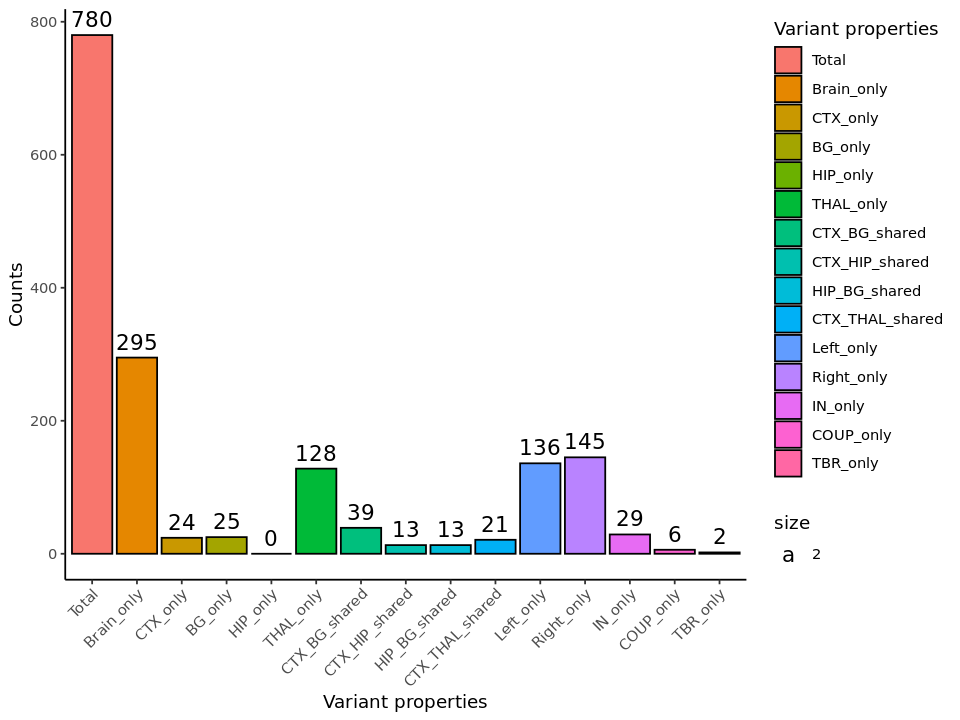

In [50]:
xxx<-factor(rownames(data), level=c('Total','Brain_only', 'CTX_only', 'BG_only', 'HIP_only', 'THAL_only',
             'CTX_BG_shared', 'CTX_HIP_shared', 'HIP_BG_shared', 'CTX_THAL_shared',
             'Left_only', 'Right_only', 'IN_only', 'COUP_only', 'TBR_only'))

options(repr.plot.width=8,repr.plot.height=6)
p<-ggplot(data=data, aes(x=xxx, y=Counts, fill=xxx)) +
geom_bar(colour="black",stat='identity')+theme_classic() + labs(x='Variant properties', colour = "Variant properties", fill="Variant properties")+
geom_text(aes(label=data$Counts, vjust = -0.5, size=2)) + theme(axis.text.x=element_text(angle=45, hjust=1))
p

In [52]:
pdf(file="./7669_VarByVar_780_All_Var.pdf",width=8,height=8)
p
dev.off()

png 
  2